Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.

Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.

Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

No skeleton: you are on your own!

Extra credit: Divide your sample geographically: by Borrow + split Manhattan in an Uptown and a Downtown sample (use your discretion to do so, but ZIP code is a good idea) and see if you notice any differences in how the age distribution can be modeled.

In [58]:
# my usual imports and setups
#this file was worked on by Dana Karwas dlk253, Baily Griswold bg1672, Jon Toy, and Christian Rosado   
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
import pandas as pd
import csv
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats

%pylab inline
import zipfile
import os

Populating the interactive namespace from numpy and matplotlib


$H_0 = F_age - F_G = 0$
Null hypothesis: The ages of citibike users are drawn from a gaussian distribution.

In [36]:
datestring = '201501'
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"
zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6845k  100 6845k    0     0  14.9M      0 --:--:-- --:--:-- --:--:-- 24.6M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [39]:
df.columns


Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'age'],
      dtype='object')

In [12]:
#df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]


In [40]:
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]


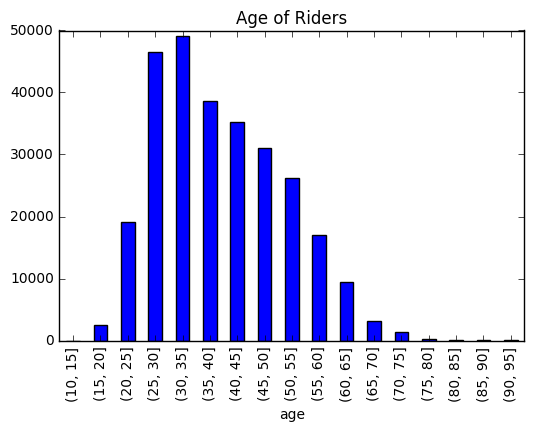

In [54]:
bins = np.arange(10,99,5)
axM = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("Age of Riders")



In [47]:
df['age'].dropna(inplace=True)
df['age'].head()

0    55.0
1    52.0
2    41.0
3    46.0
4    38.0
Name: age, dtype: float64

In [48]:
df ['age'].values

array([ 55.,  52.,  41., ...,  21.,  58.,  41.])

In [49]:
scipy.stats.kstest(df['age'].values,'norm', args=(df.age.mean(), df.age.std()))
# first entry is rvs = observation s that we are trying to determine the distro of
# cdf norm
# a standard normal will have a mean of 0, st deviation 1

KstestResult(statistic=0.087552112722896369, pvalue=0.0)

# We will reject the null hypothesis because the p value = 0.0, so we will reject the null hypothesis that the age of city bike users is drawn from a chi-squared distribution

In [55]:
scipy.stats.kstest(df['age'].values, 'chi2', args=(df.age.mean(),df.age.std()))

KstestResult(statistic=0.47545108561846439, pvalue=0.0)

##  The p-value is 0.0, so we will reject the null hypothesis that the age of city bike users is drawn from a normal distribution

In [56]:
scipy.stats.anderson(df['age'].values, dist='extreme1')

AndersonResult(statistic=inf, critical_values=array([ 0.474,  0.637,  0.757,  0.877,  1.038]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ]))

## For this Anderson test I obtained a stat of "inf", which it is going to stop counting because it is infinite. My alpha is .05, so I am going to reject the H0 if it is above the third entry in the critical values 0.757. We reject the null hypotheses that ages of citibike riders are drawn from the logistic distribution